In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


importing libraries --


In [2]:
df = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")

In [3]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
new_columns = ["age", "sex", "cp", "trtbps", "chol", "fbs", "rest_ecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]


In [6]:
df.columns = new_columns

In [7]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
print("Shape of Dataset:", df.shape)

Shape of Dataset: (303, 14)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Analysis Outputs
* dataset consists of 303 rows and 14 columns
* The type of all the variables in the dataset are numerical
* There is no missing value (NaN value) in the dataset

### Preparation for EDA

In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)
    
pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


<Axes: >

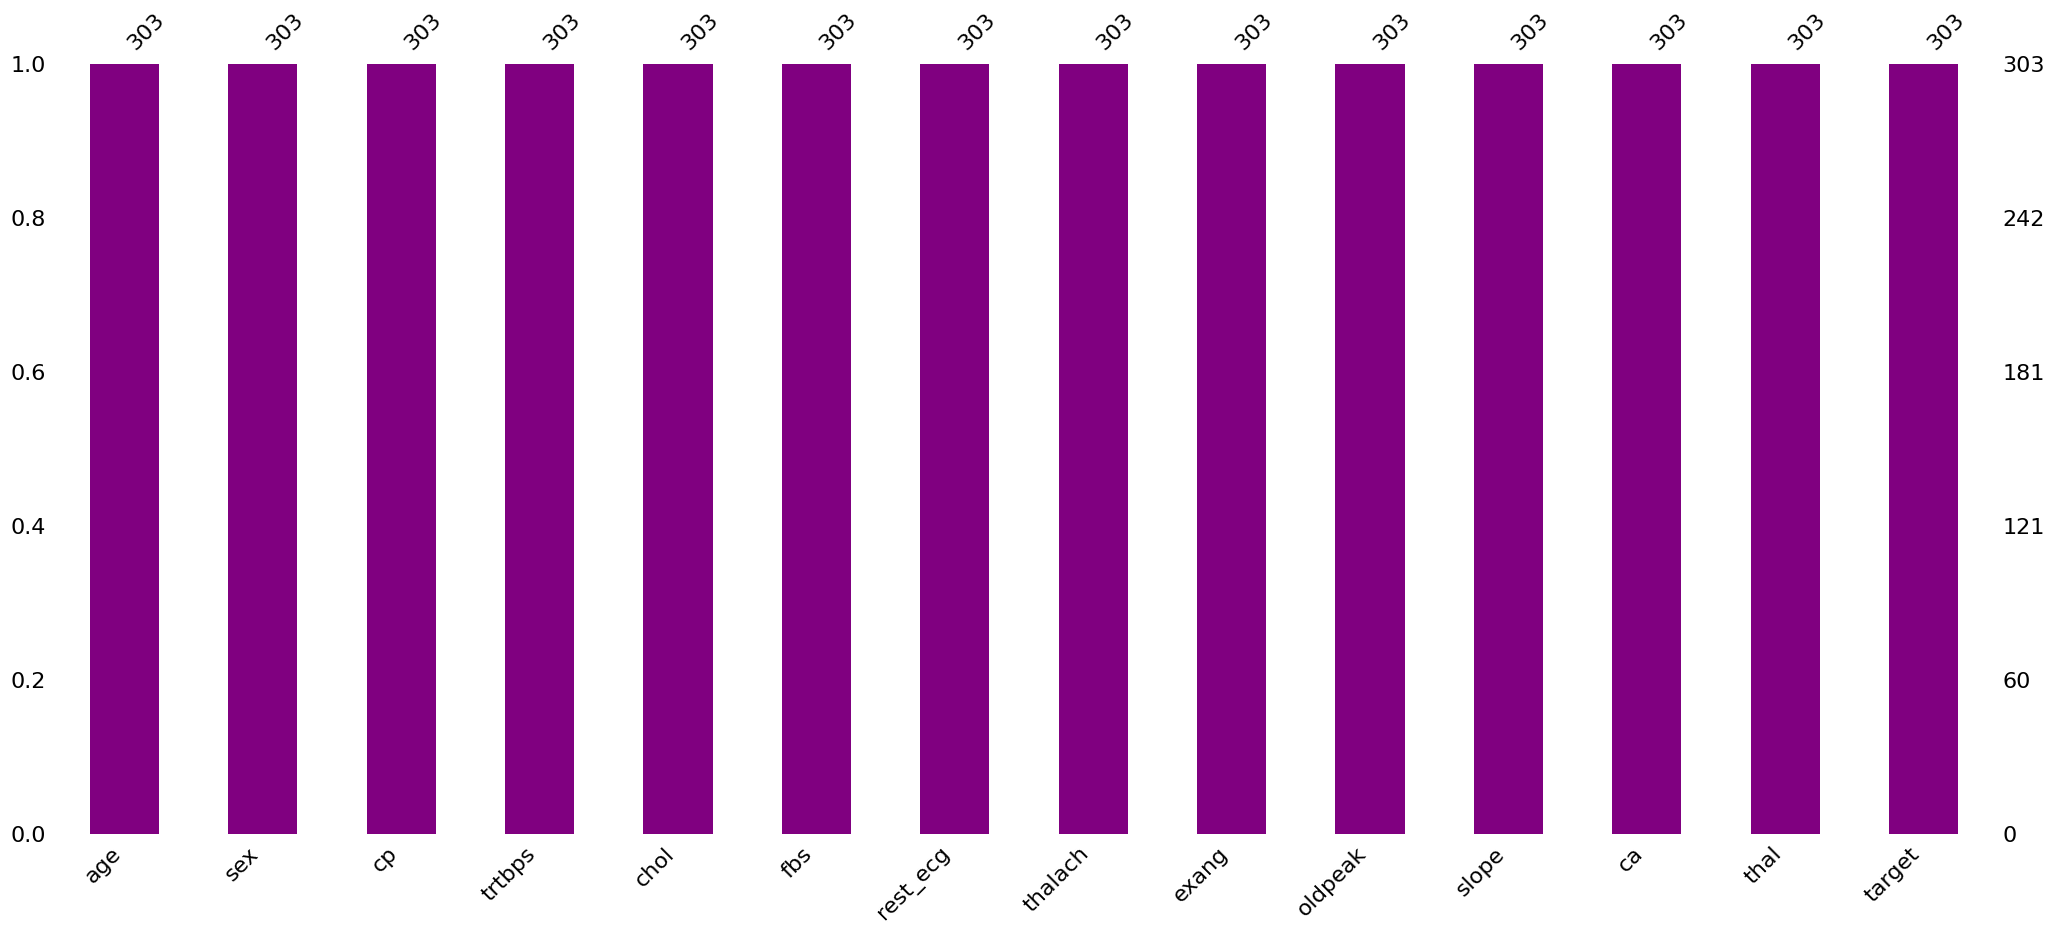

In [12]:
import missingno
missingno.bar(df, color ="purple")

### Examining Unique Values

In [13]:
df["cp"].value_counts().count()

4

In [14]:
unique_number = []
for i in df.columns:
    x = df[i].value_counts().count()
    unique_number.append(x)
    
pd.DataFrame(unique_number, index = df.columns, columns = ["Total Unique Values"])

,Total Unique Values
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
rest_ecg,3
thalach,91
exang,2
oldpeak,40


helps decide which variables are numerical and which are categorical
##### Results
* numeric variables: age, trtbps, chol, thalach and oldpeak
* categorical variables: sex, cp, fbs, rest_ecg, exang, slope, ca, thal, target

#### Separating variables

In [15]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
numeric_var = ["age", "trtbps", "chol", "thalach", "oldpeak"]
categoric_var = ["sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca", "thal", "target"]

#### Examining statistics of variables

In [17]:
df[numeric_var].describe()

,age,trtbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


<Axes: xlabel='age', ylabel='Density'>

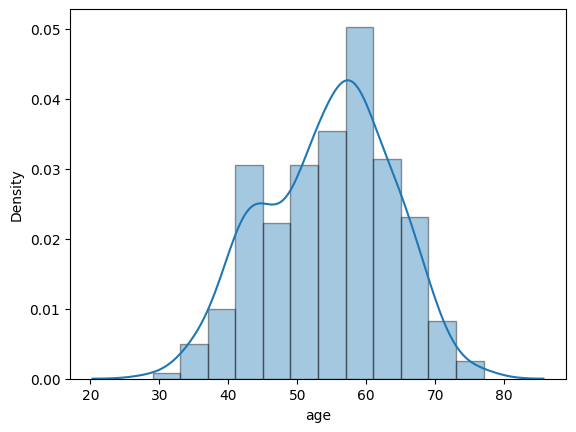

In [18]:
sns.distplot(df["age"], hist_kws = dict(linewidth=1, edgecolor="k"))

<Axes: xlabel='trtbps', ylabel='Density'>

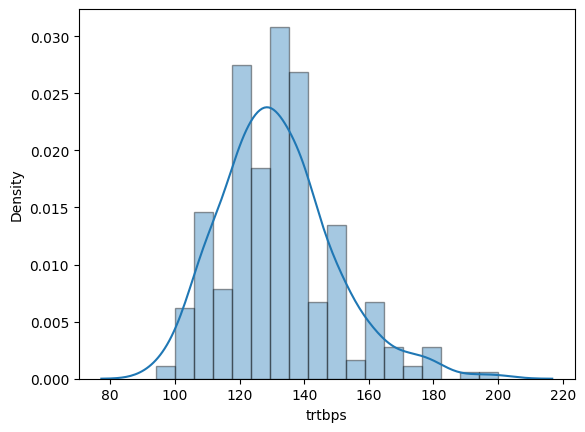

In [19]:
sns.distplot(df["trtbps"], hist_kws = dict(linewidth=1, edgecolor="k"))

<Axes: xlabel='chol', ylabel='Density'>

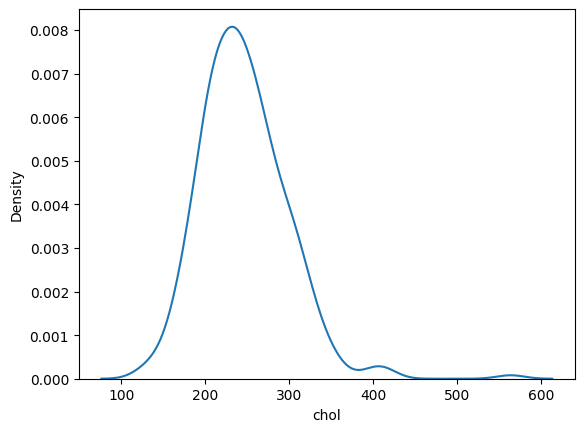

In [20]:
sns.distplot(df["chol"], hist = False)

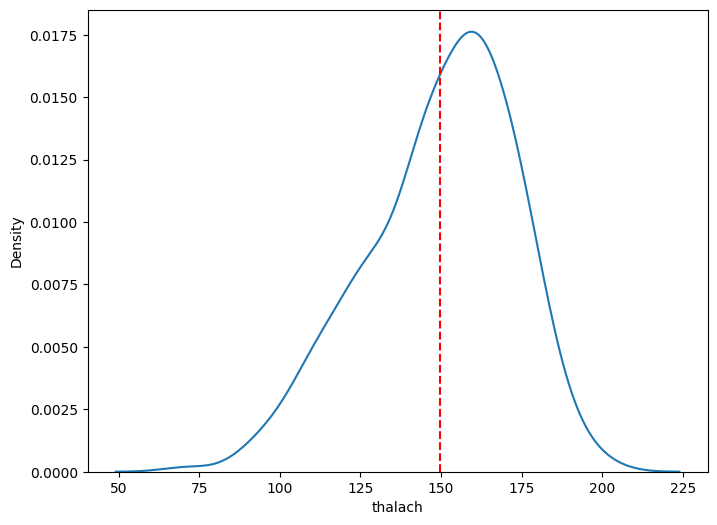

In [21]:
x, y = plt.subplots(figsize =(8,6))
sns.distplot(df["thalach"], hist = False)
y.axvline(df["thalach"].mean(), color ="r", ls = "--");

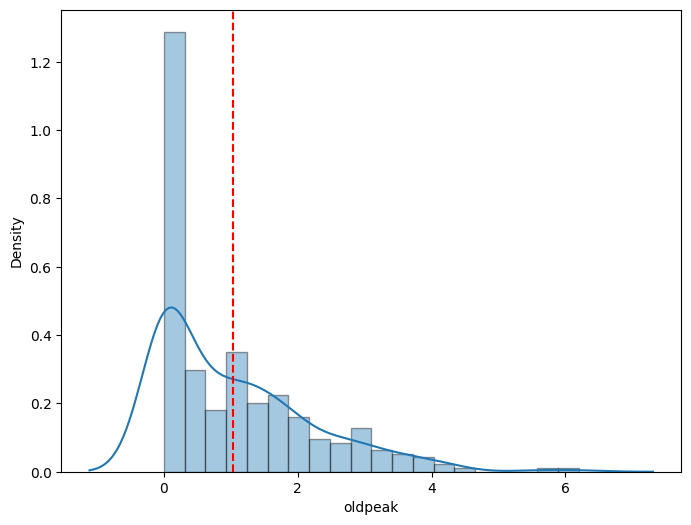

In [22]:
x, y = plt.subplots(figsize =(8,6))
sns.distplot(df["oldpeak"], hist_kws = dict(linewidth=1, edgecolor="k"), bins =20, ax=y)
y.axvline(df["oldpeak"].mean(), color ="r", ls = "--");

Most ML models work better on data that are normally distributed. We can observe the skew from normal distribution from the statistics obtained initially (comparing midpoint and average)

### Numeric variables analysis with distplot

In [23]:
numeric_axis_name = ["Age of the Patient", "Resting Blood Pressure", "Cholesterol", "Maximum Heart rate achieved", "ST Depression"]

In [24]:
list(zip(numeric_var, numeric_axis_name))

[('age', 'Age of the Patient'),
 ('trtbps', 'Resting Blood Pressure'),
 ('chol', 'Cholesterol'),
 ('thalach', 'Maximum Heart rate achieved'),
 ('oldpeak', 'ST Depression')]

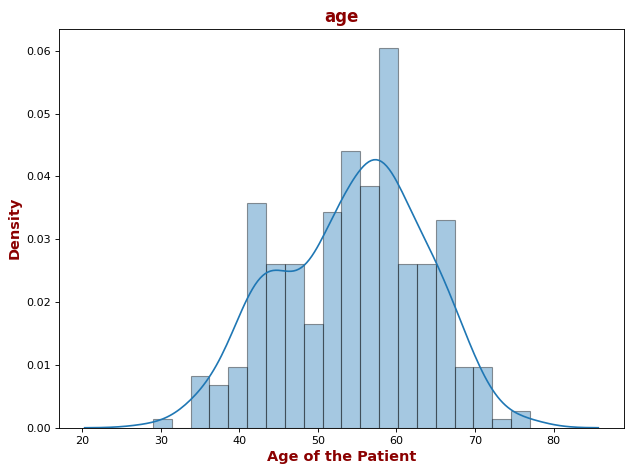

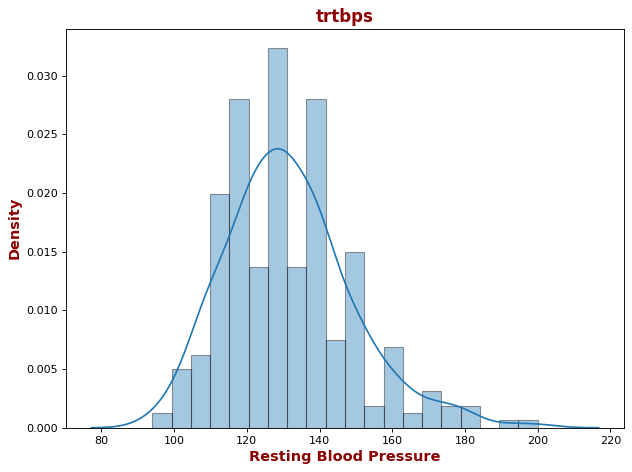

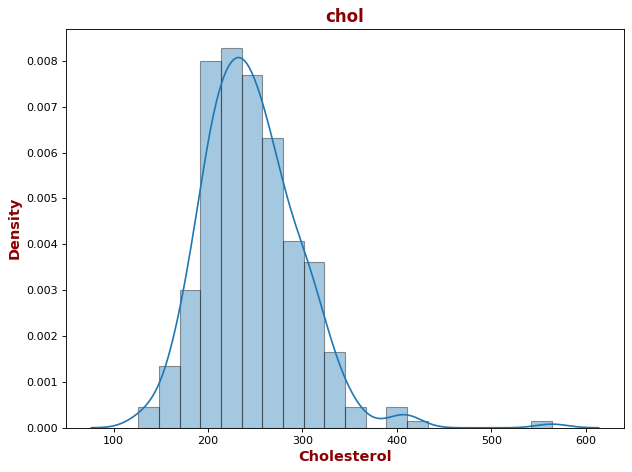

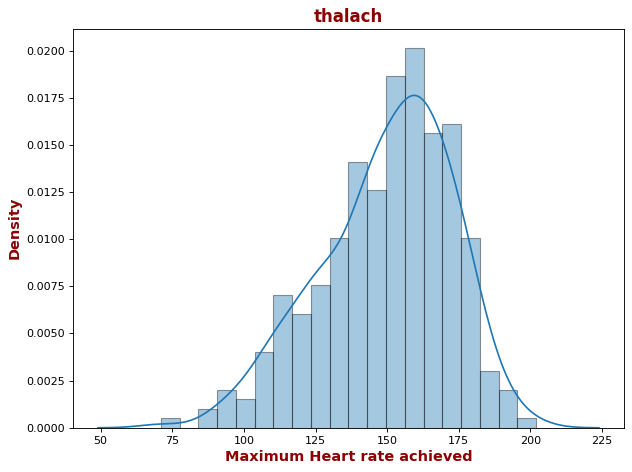

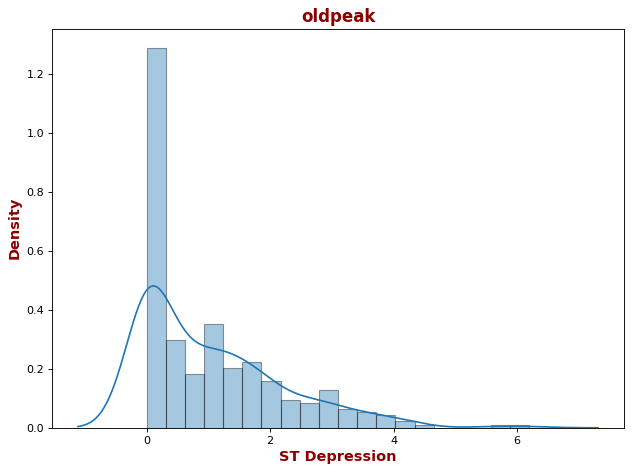

In [25]:
title_font = {"family": "arial", "color": "darkred", "weight": "bold", "size" :15}
axis_font = {"family": "arial", "color": "darkred", "weight": "bold", "size" :13}
for i, z in list(zip(numeric_var, numeric_axis_name)):
    plt.figure(figsize = (8,6), dpi =80)
    sns.distplot(df[i], hist_kws = dict(linewidth=1, edgecolor="k"), bins =20)
    
    plt.title(i, fontdict = title_font)
    plt. xlabel(z, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

### Categorical variable analysis

In [26]:
categoric_var

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [27]:
categoric_axis_name = ["Gender", "Chest Pain Type", "Fasting Blood sugar", "Resting Electrocardiographic Results",
                      "Exercise Induced Angina", "The Slope of ST Segment", "Number of Major Vessels", "Thal", "Target"]

In [28]:
list(zip(categoric_var, categoric_axis_name))

[('sex', 'Gender'),
 ('cp', 'Chest Pain Type'),
 ('fbs', 'Fasting Blood sugar'),
 ('rest_ecg', 'Resting Electrocardiographic Results'),
 ('exang', 'Exercise Induced Angina'),
 ('slope', 'The Slope of ST Segment'),
 ('ca', 'Number of Major Vessels'),
 ('thal', 'Thal'),
 ('target', 'Target')]

In [29]:
df["cp"].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [30]:
list(df["cp"].value_counts())

[143, 87, 50, 23]

In [31]:
list(df["cp"].value_counts().index)

[0, 2, 1, 3]

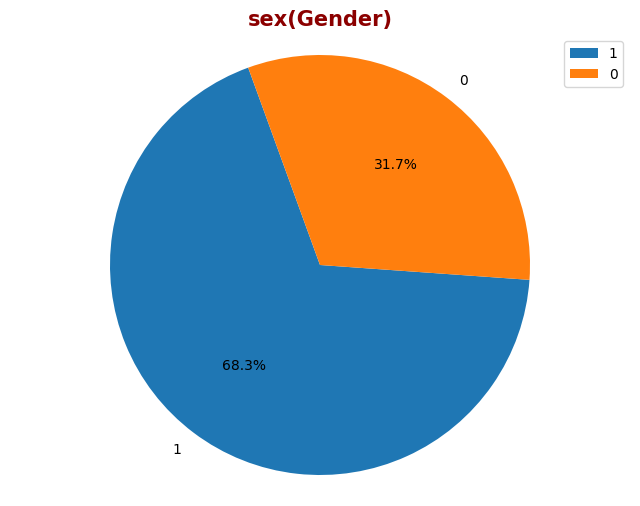

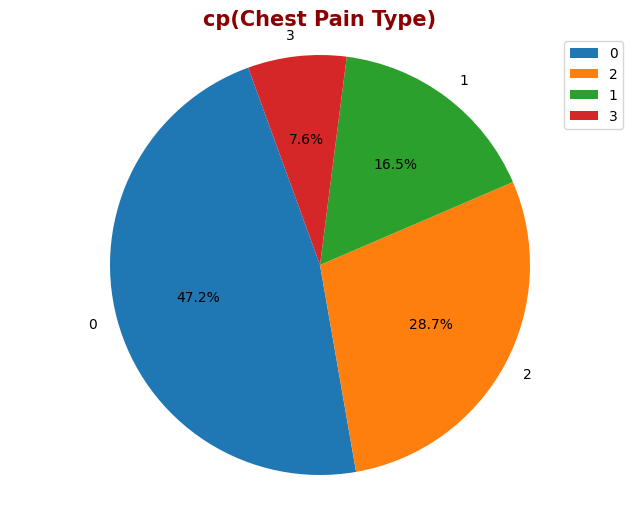

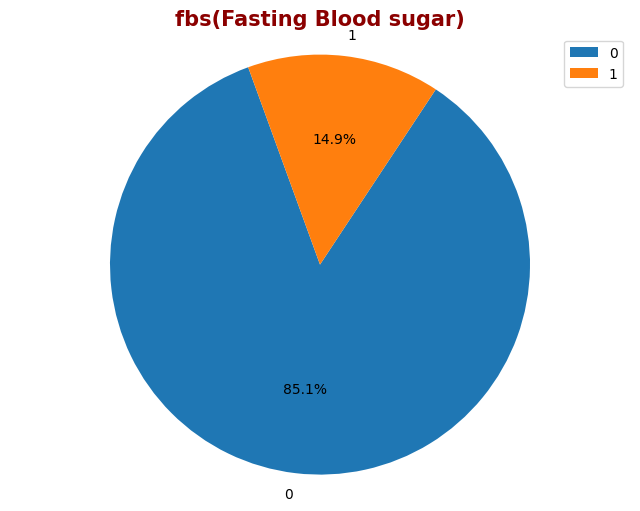

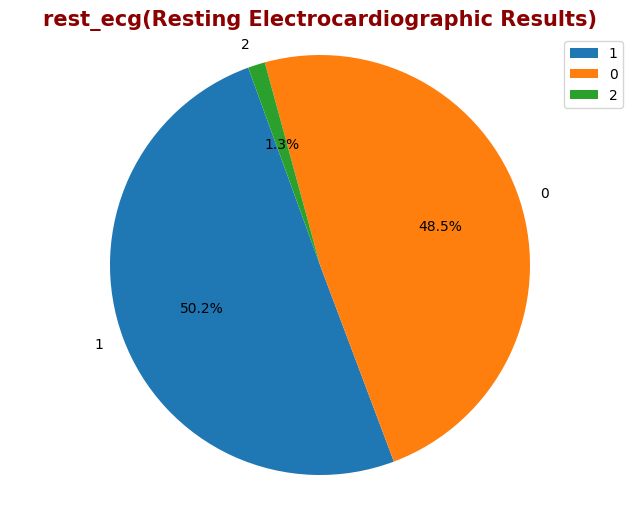

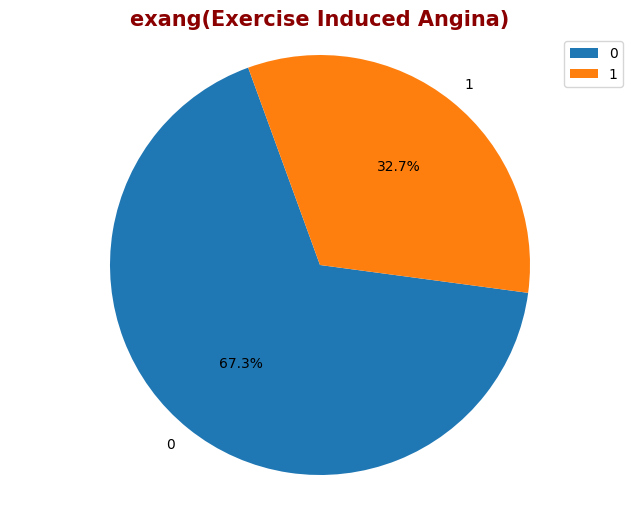

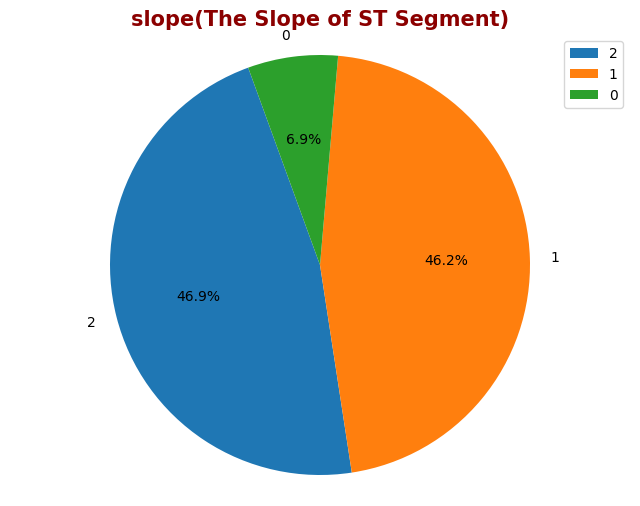

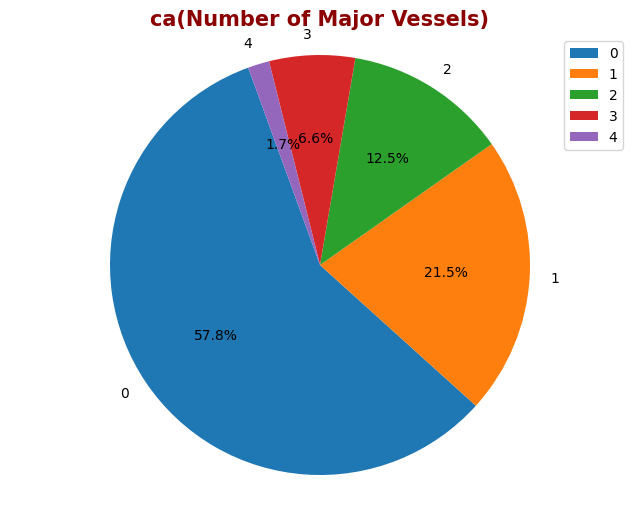

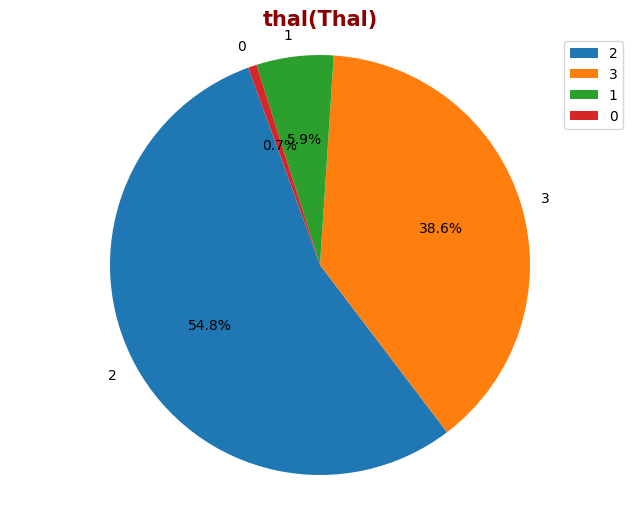

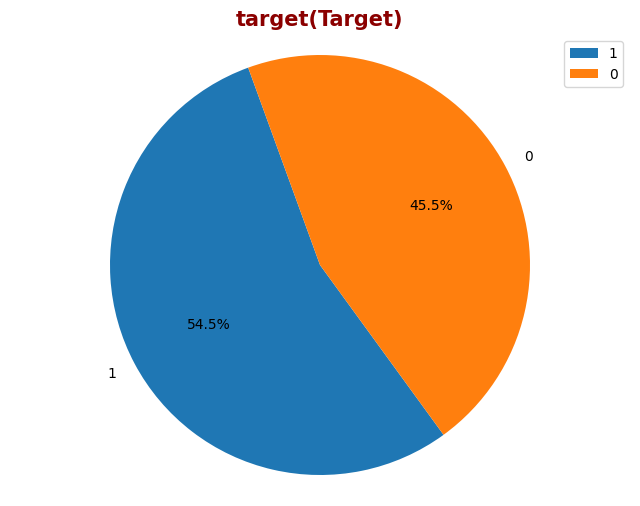

In [32]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(categoric_var, categoric_axis_name)):
    fig, ax = plt.subplots(figsize = (8, 6))
    
    observation_values = list(df[i].value_counts().index)
    total_observation_values = list(df[i].value_counts())
    
    ax.pie(total_observation_values, labels= observation_values, autopct = '%1.1f%%', startangle = 110, labeldistance = 1.1)
    ax.axis("equal") # Equal aspect ratio ensures that pie is drawn as a circle.
    
    plt.title((i + "(" + z + ")"), fontdict = title_font) # Naming Pie Chart Titles
    plt.legend()
    plt.show()

#### Examining missing data according to analysis

In [33]:
df[df["thal"] == 0]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [34]:
df["thal"] = df["thal"].replace(0, np.nan)

In [35]:
df.loc[[48, 281], :]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,NaN,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,NaN,0


In [36]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)
    
pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


In [37]:
df["thal"].fillna(2, inplace = True)

In [38]:
df.loc[[48, 281], :]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,2.0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,2.0,0


In [39]:
df

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1.0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2.0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2.0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2.0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3.0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3.0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3.0,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3.0,0


In [40]:
df["thal"] = pd.to_numeric(df["thal"], downcast = "integer")

In [41]:
df.loc[[48, 281], :]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,2,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,2,0


In [42]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)
    
pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


In [43]:
df["thal"].value_counts()

thal
2    168
3    117
1     18
Name: count, dtype: int64

#### Bi-variate analysis

##### Numerical variables

In [44]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [45]:
numeric_var.append("target")

In [46]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']

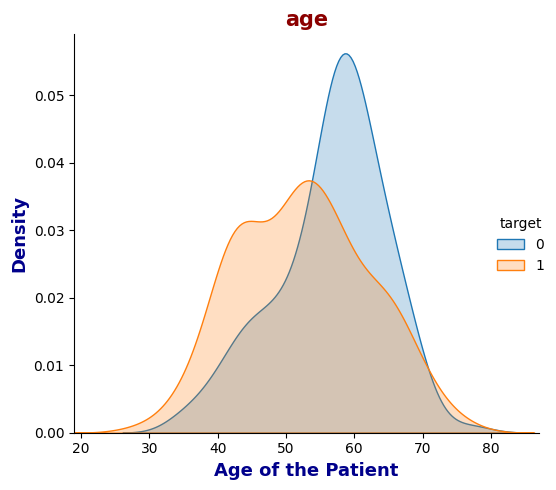

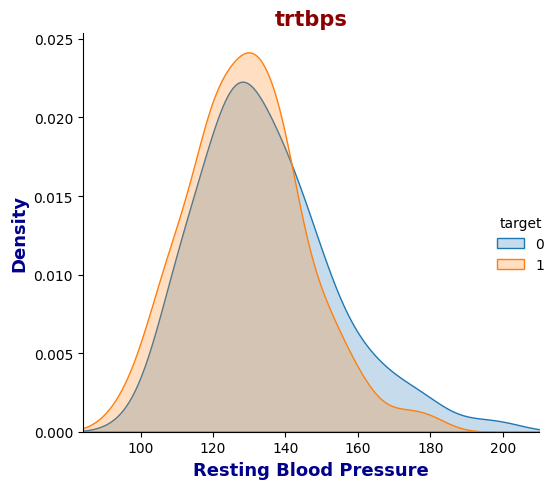

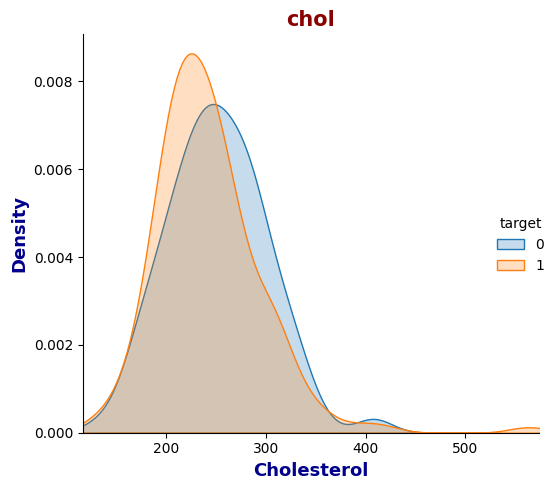

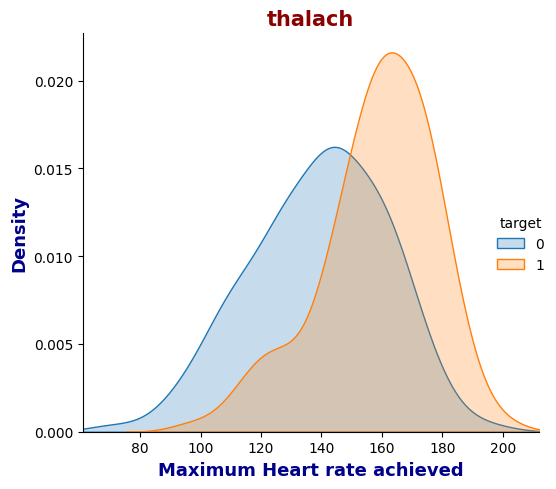

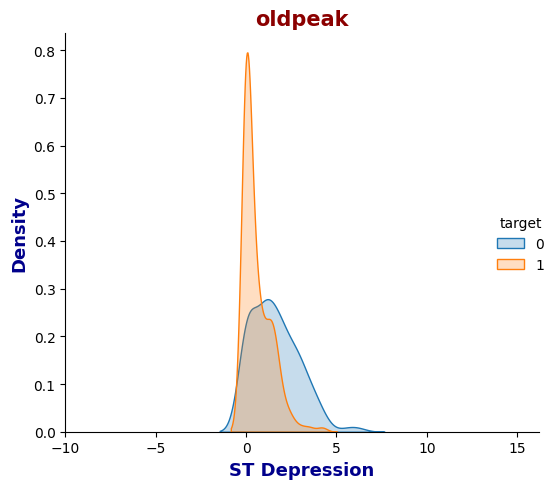

In [47]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(numeric_var, numeric_axis_name)):
    graph = sns.FacetGrid(df[numeric_var], hue = "target", height = 5, xlim = ((df[i].min() - 10), (df[i].max() + 10)))
    graph.map(sns.kdeplot, i, shade = True)
    graph.add_legend()
    
    plt.title(i, fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

In [48]:
df[numeric_var].corr()

,age,trtbps,chol,thalach,oldpeak,target
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.225439
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.085239
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,0.421741
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,-0.430696
target,-0.225439,-0.144931,-0.085239,0.421741,-0.430696,1.000000


In [49]:
df[numeric_var].corr().iloc[:, [-1]]

,target
age,-0.225439
trtbps,-0.144931
chol,-0.085239
thalach,0.421741
oldpeak,-0.430696
target,1.000000


##### Target variable analysis with countplot

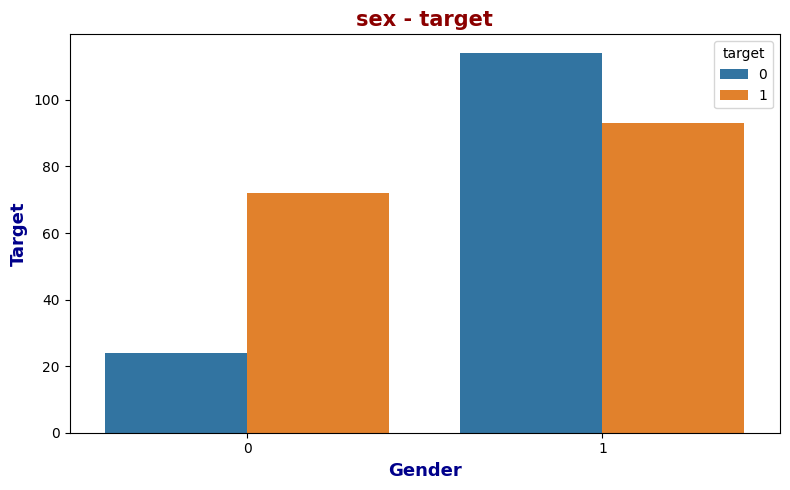

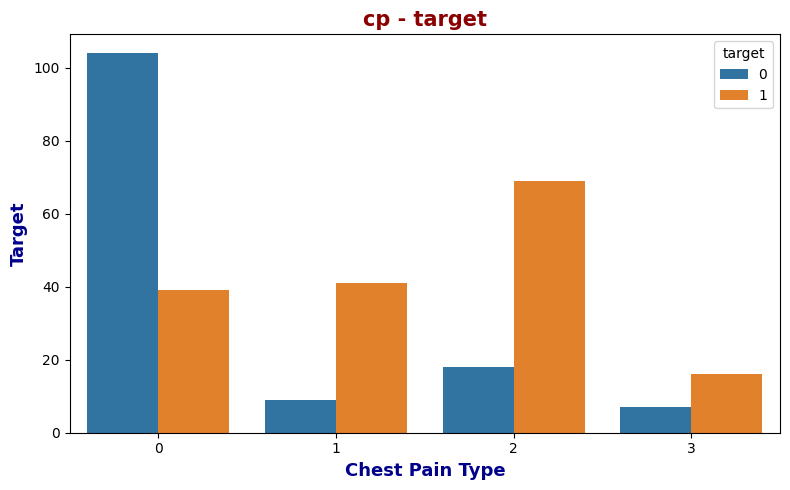

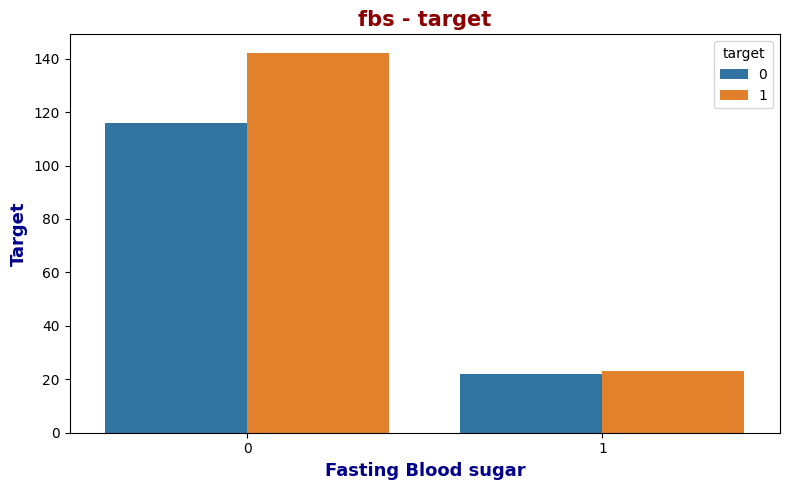

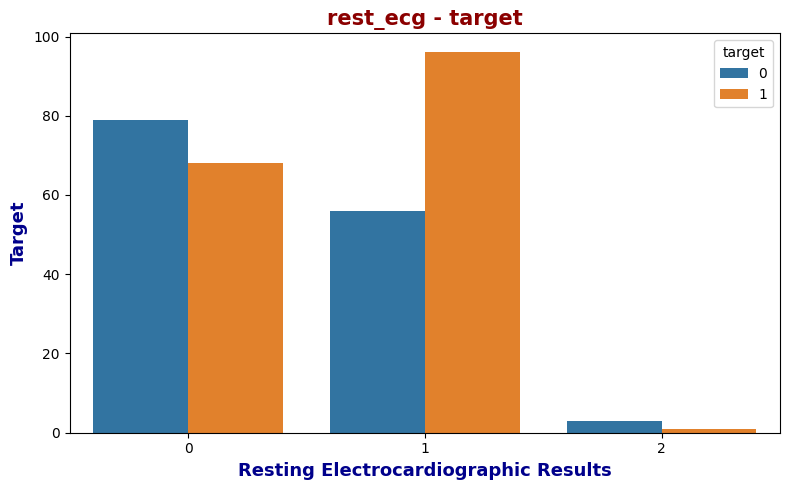

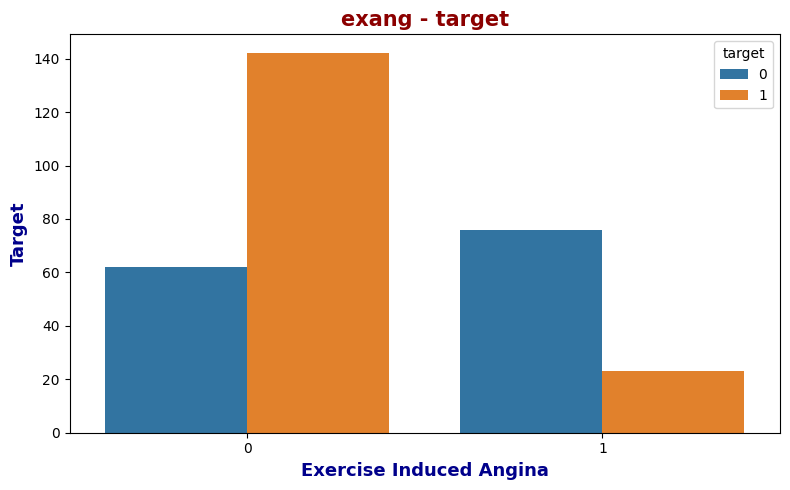

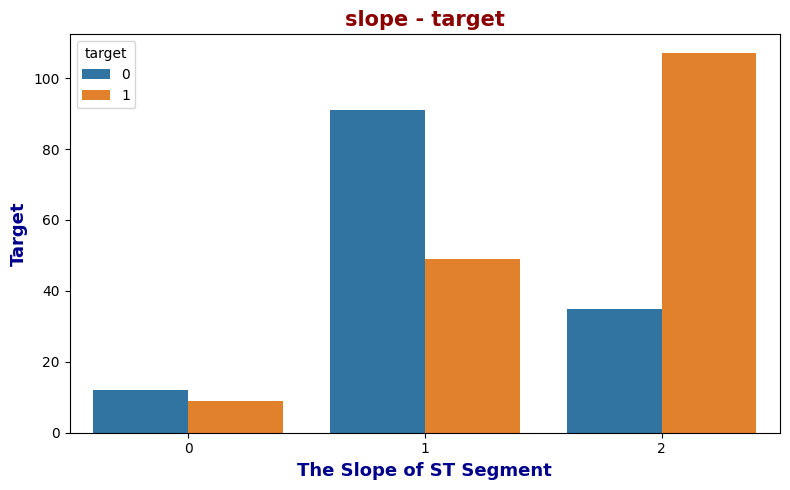

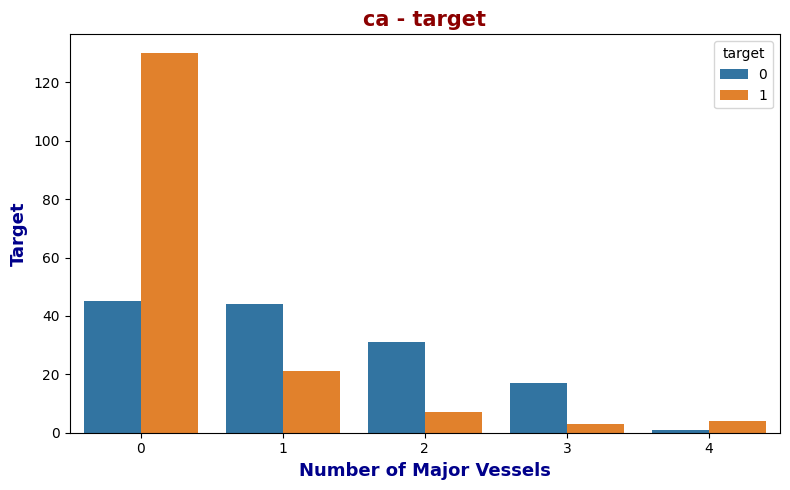

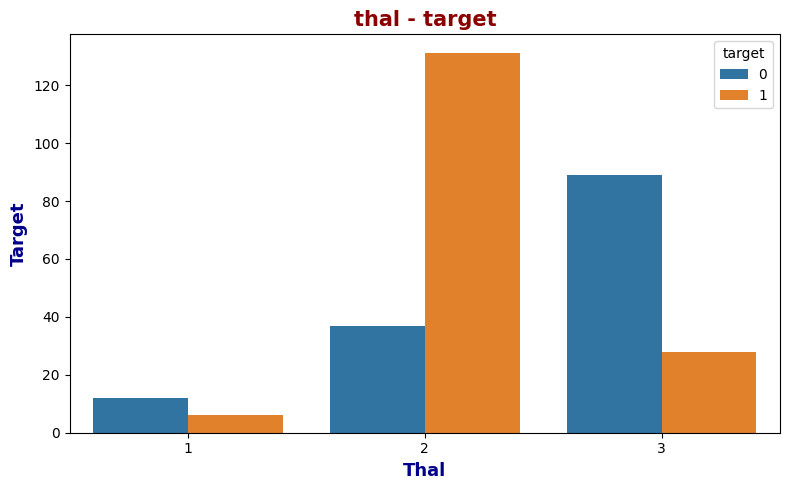

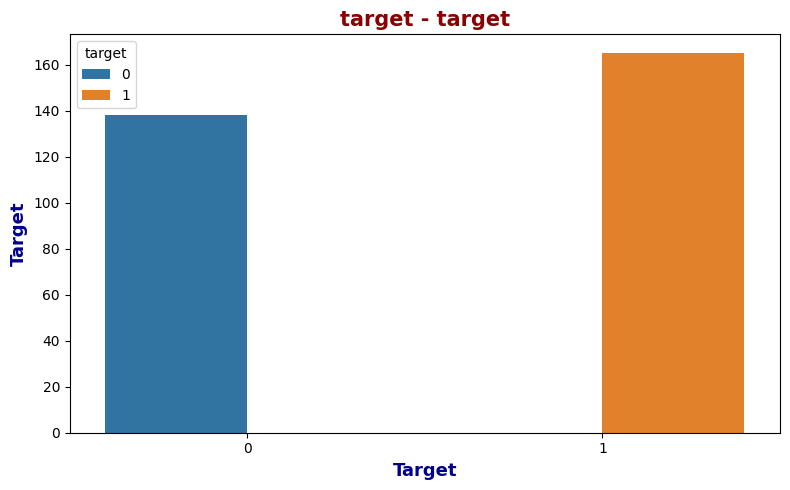

In [50]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(categoric_var, categoric_axis_name)):
    plt.figure(figsize = (8, 5))
    sns.countplot(x=i, data = df, hue = "target")
    
    plt.title(i + " - target", fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Target", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()